In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

import pandas as pd
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_context('talk', font_scale=1)

import numpy as np
import scipy.stats as stats
import os

In [7]:
samples = pd.read_table('../../../ExpansionHunter-pipeline/config/50-samples.tsv')
samples = samples.set_index('Sample')
paths = ['../../resources/mutations/active/{}.tsv'.format(s) for s in samples.index]

In [24]:
paths = snakemake.input

In [8]:
dfs = []
for path in paths:
    df = pd.read_table(path)
    dfs.append(df)

FileNotFoundError: [Errno 2] No such file or directory: '../../resources/mutations/active/NA12842.tsv'

In [ ]:
data = pd.concat(dfs)

In [ ]:
data.head()

In [ ]:
# data = data.groupby(['sample', 'position', 'flank', 'locus_id']).agg('sum')
# data = data.reset_index()
# data.head()

In [ ]:
data['sum'] = data['matches'] + data['mismatches'] + data['insertions'] + data['deletions']

In [ ]:
data['pct_matches'] = data['matches'] / data['sum']
data['pct_mismatches'] = data['mismatches'] / data['sum']
data['pct_insertions'] = data['insertions'] / data['sum']
data['pct_deletions'] = data['deletions'] / data['sum']
data['pct_non_matches'] = 1 - data['pct_matches']

In [ ]:
thresh = data['sum'].median() - 1 * data['sum'].std()
data = data[data['sum'] > thresh]
thresh

In [ ]:
data.loc[data['flank'] == 'left', 'position'] *= -1

In [ ]:
data['is_match'] = data['pct_matches'] > 0.75

In [ ]:
pdf = PdfPages(snakemake.output[0])

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='position', y='pct_non_matches', data=data, ax=ax, sort=True)
ax.set_ylabel('Pct. Non-Matches')
ax.set_xlabel('Distance from STR')

In [ ]:
pdf.savefig(fig)

Text(0.5, 0, 'Distance from STR')

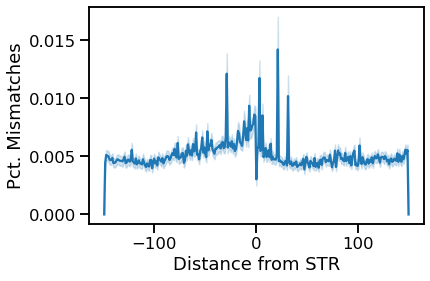

In [79]:
fig, ax = plt.subplots()
sns.lineplot(x='position', y='pct_mismatches', data=data, ax=ax, sort=True)
ax.set_ylabel('Pct. Mismatches')
ax.set_xlabel('Distance from STR')

In [ ]:
pdf.savefig(fig)

Text(0.5, 0, 'Distance from STR')

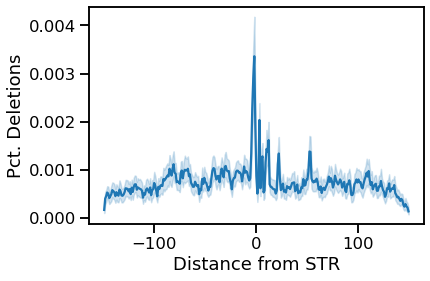

In [80]:
fig, ax = plt.subplots()
sns.lineplot(x='position', y='pct_deletions', data=data, ax=ax, sort=True)
ax.set_ylabel('Pct. Deletions')
ax.set_xlabel('Distance from STR')

In [ ]:
pdf.savefig(fig)

Text(0.5, 0, 'Distance from STR')

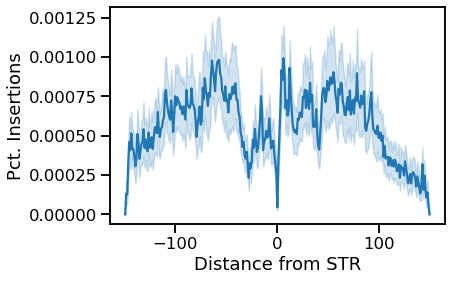

In [81]:
fig, ax = plt.subplots()
sns.lineplot(x='position', y='pct_insertions', data=data, ax=ax, sort=True)
ax.set_ylabel('Pct. Insertions')
ax.set_xlabel('Distance from STR')

In [ ]:
pdf.savefig(fig)

In [ ]:
pdf.close()